In [27]:
import ase
from ase.visualize import view
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import distance

import milad
from milad import atomic
from milad import fingerprinting
from milad import generate
from milad import invariants
from milad import optimisers
from milad import reconstruct
from milad import zernike

Load the structures from Pozdnyakov, S. N., Willatt, M. J., Bartók, A. P., Ortner, C., Csányi, G., & Ceriotti, M. (2020). Incompleteness of Atomic Structure Representations. Physical Review Letters, 125(16), 166001. http://doi.org/10.1103/PhysRevLett.125.166001

In [12]:
one, two = generate.chiral_tetrahedra()
natoms = len(one)

In [3]:
view(ase.Atoms(positions=6. * one), viewer='ngl')

In [4]:
view(ase.Atoms(positions=6. * two), viewer='ngl')

Load Zernike invariants up to $n_\text{max} = 7$

In [5]:
complex_invariants = invariants.read('complex')

Create the moments and then calculate the fingerprint

In [6]:
phi_left = complex_invariants(zernike.from_deltas(7, one))
phi_right = complex_invariants(zernike.from_deltas(7, two))
diff = phi_left - phi_right

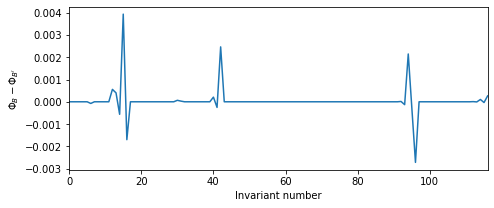

In [7]:
xvals = tuple(range(len(diff)))
plt.figure(figsize=(7.5, 3))
plt.plot(xvals, diff)
plt.ylabel("$\Phi_B - \Phi_{B'}$")
plt.xlabel('Invariant number')
plt.xlim([0, 116])
plt.savefig('pozdnyakov_diff.pdf', dpi=300, bbox_inches='tight')
plt.show()

print(f'{(sum(~np.isclose(diff, 0)))} / {sum(inv.degree == 4 for inv in complex_invariants)} ')

We see that 21 out of 29 of the invariants are non-zero when comparing the fingerprints of the two structures.